# Workshop 7: Numerical differentiation and integration

The lecture this week introduced you to the first application of numerical techniques. We will explore the applications to Python in this workshop. 

## OkPy Submission Instructions

In this lab, we will use OkPy to submit assignments, and also to grade them. At the end of the iPython notebook, you will find a line of code `_ = ok.submit()` that you **must run to submit your assignment to OkPy**. You can run this lines of code multiple times to submit revisions up until the deadline.

You must also run the very first code block that imports the OkPy modules needed to submit your assignment.

In [2]:
# Don't change this cell; just run it. 
from client.api.notebook import Notebook
ok = Notebook('Workshop06.ok')
_ = ok.auth(inline=True)

ImportError: No module named client.api.notebook

## Numerical differentiation

First, let's do differentiation "by hand" using loops, which is illustrative. Some examples borrowed (and modified) from http://gilgamesh.cheme.cmu.edu/doc/software/jacapo/9-numerics/9.1-numpy

These are examples of the "brute force" differentiation. They work well for a smooth vector, i.e. if there is not much "noise" on top of the function you are trying to differentiate. 

In [2]:
from pylab import *  # imports numpy, scipy, and matplotlib (convenient)
%matplotlib inline

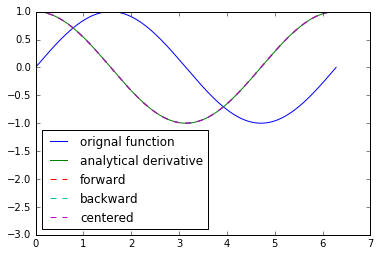

In [3]:
x = np.linspace(0,2*pi,1000)
y = sin(x)
dy_analytical = cos(x)


# lets use a forward difference method:
# that works up until the last point, where there is not
# a forward difference to use. there, we use a backward difference.

dyf = [0.0]*len(x)
for i in range(len(y)-1):
    dyf[i] = (y[i+1] - y[i])/(x[i+1]-x[i])
#set last element by backwards difference
dyf[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

# and now a backwards difference

dyb = [0.0]*len(x)
#set first element by forward difference
dyb[0] = (y[0] - y[1])/(x[0] - x[1])
for i in range(1,len(y)):
    dyb[i] = (y[i] - y[i-1])/(x[i]-x[i-1])

# and now, a centered formula
dyc = [0.0]*len(x)
dyc[0] = (y[0] - y[1])/(x[0] - x[1])
for i in range(1,len(y)-1):
    dyc[i] = (y[i+1] - y[i-1])/(x[i+1]-x[i-1])
dyc[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

# compare the methods

plot(x,y,label='orignal function')
plot(x,dy_analytical,label='analytical derivative')
plot(x,dyf,'--',label='forward')
plot(x,dyb,'--',label='backward')
plot(x,dyc,'--',label='centered')
ylim(-3,1)
legend(loc='lower left')
show()

### Exercise 1
1. Plot the ratios of each numerical derivative to the analytical formula. Which method is most accurate ? 
1. Vary the number of points in the vector representing the original function (try 10, 100, 1000 steps). How does the precision change ? 

#### How to format answers using Markdown:
Double click on a text block to edit, and then run the cell (via the run button or `shift-enter`) for it to output as Markdown text. Markdown is recommended for making your answers look nicer.

In [ ]:
## Code here for exercise 1.1 and 1.2


### Answers to Exercise 1
1.

2. 

Loops are usually "expensive" in Python, i.e. they take a lot of computational time to process. Numpy offers some vectorized methods that allow us to compute derivatives without Python loops (i.e. loops are done internally, in a highly optimized code). This comes at the cost of a more obscure syntax:

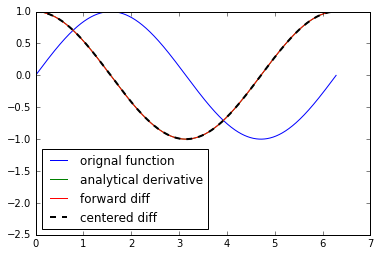

In [4]:
x = np.linspace(0,2*pi,1000)
y = sin(x)
dy_analytical = cos(x)

# we need to specify the size of dy ahead because diff returns
# an array of n-1 elements
dy = zeros(y.shape,float) # we know it will be this size
dy[0:-1] = diff(y)/np.diff(x)
dy[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])


# calculate dy by center differencing using array slices

dy2 = np.zeros(y.shape,float) #we know it will be this size
dy2[1:-1] = (y[2:] - y[0:-2])/(x[2:] - x[0:-2])
dy2[0] = (y[1]-y[0])/(x[1]-x[0])
dy2[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

plot(x,y,label='orignal function')
plot(x,dy_analytical,label='analytical derivative')
plot(x,dy,label='forward diff')
plot(x,dy2,'k--',lw=2,label='centered diff')
ylim(-2.5,1)
legend(loc='lower left')
show()


SciPy offers a library function to compute derivatives along the lines of the code you just did. Here is an example of its use. See full documentation at http://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html

In [5]:
from scipy.misc import derivative

print derivative(func=sin, x0=pi, dx=1e-6, n=1, order=3)

-1.00000000014


### Exercise 2

1. Compare the precision *scipy.misc.derivative* function to your "centered diff" calculation above. Vary parameters *dx* and *order* to see 
1. Vary parameter *n* (order of the derivative). Does the calculation of the n-th derivative behave like what you'd expect ? 

If your data are very noisy, numerical errors on computed derivatives will be large; derivatives tend to magnify noise. In these cases, you have to employ smoothing techniques, either implicitly by using a multipoint derivative formula, or explicitly by smoothing the data yourself, or taking the derivative of a function that has been fit to the data in the neighborhood you are interested in.

Here is an example of a 4-point centered difference of some noisy data (courtesy http://gilgamesh.cheme.cmu.edu/doc/software/jacapo/9-numerics/9.1-numpy/9.2-integration.html#numerical-differentiation):

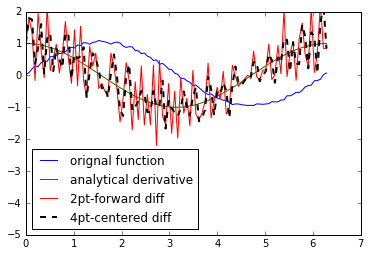

In [6]:
x = linspace(0,2*np.pi,100)
y = sin(x) + 0.1*random(size=x.shape)
dy_analytical = cos(x)

#2-point formula
dyf = [0.0]*len(x)
for i in range(len(y)-1):
    dyf[i] = (y[i+1] - y[i])/(x[i+1]-x[i])
#set last element by backwards difference
dyf[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

'''
calculate dy by 4-point center differencing using array slices

\frac{y[i-2] - 8y[i-1] + 8[i+1] - y[i+2]}{12h}

y[0] and y[1] must be defined by lower order methods
and y[-1] and y[-2] must be defined by lower order methods
'''

dy = zeros(y.shape,float) #we know it will be this size
h = x[1]-x[0] #this assumes the points are evenely spaced!
dy[2:-2] = (y[0:-4] - 8*y[1:-3] + 8*y[3:-1] - y[4:])/(12.*h)

dy[0] = (y[1]-y[0])/(x[1]-x[0])
dy[1] = (y[2]-y[1])/(x[2]-x[1])
dy[-2] = (y[-2] - y[-3])/(x[-2] - x[-3])
dy[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])


plot(x,y,label='orignal function')
plot(x,dy_analytical,label='analytical derivative')
plot(x,dyf,'r-',label='2pt-forward diff')
plot(x,dy,'k--',lw=2,label='4pt-centered diff')
ylim(-5,2)
legend(loc='lower left')
show()


## Numerical integration

Material borrowed and modified from http://www.physics.nyu.edu/pine/pymanual/html/chap9/chap9_scipy.html

When a function cannot be integrated analytically, or is very difficult to integrate analytically, one generally turns to numerical integration methods. SciPy has a number of routines for performing numerical integration. Most of them are found in the same scipy.integrate library. See http://docs.scipy.org/doc/scipy-0.14.0/reference/integrate.html for the full reference and documentation


### Single integration

The function *quad* is the workhorse of SciPy’s integration functions. Numerical integration is sometimes called quadrature (see lecture notes), hence the name. It is normally the default choice for performing single integrals of a function $f(x)$ over a given fixed range from $a$ to $b$:

$$\int_a^b f(x) dx$$

The general form of *quad* is *scipy.integrate.quad(f, a, b)*, where *f* is the name of the function to be integrated and *a* and *b* are the lower and upper limits, respectively. The routine uses adaptive quadrature methods to numerically evaluate integrals, meaning it successively refines the subintervals (makes them smaller) until a desired level of numerical precision is achieved. For the quad routine, this is about 1e-8, although it usually does even better.

As an example, let’s integrate a Gaussian function over the range from $-1$ to $1$

$$\int_{-1}^1 \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{x^2}{2}\right) dx$$

We first need to define the function $f(x)=e^{-x^2/2}/\sqrt{2\pi}$, which we do using a *lambda* expression, and then we call the function *quad* to perform the integration.


In [7]:
import scipy.integrate

f = lambda x : exp(-x**2/2)/sqrt(2*pi)
print scipy.integrate.quad(f, -1, 1)


(0.682689492137086, 7.579375928402476e-15)


### Exercise 3

Compare the value to the known central quantile of the Gaussian distribution

The function call *scipy.integrate.quad(f, 0, 1)* returns a tuple of two numbers. The first is 0.6826..., which is the value of the integral, and the second is 7.57...e-15, which is an estimate of the absolute error in the value of the integral. The estimated precision is very good ! 

Because *quad* requires a callable object (e.g. a function name) as its first argument, we have to define this function first. We could use the usual *def* statement to create a normal function, and then use the name of that function in *quad*. However, it’s simpler here to use a *lambda* expression. In fact, we can just put the *lambda* expression directly into the first argument, as illustrated here


In [8]:
import scipy
from scipy.integrate import quad, quadrature, fixed_quad

In [9]:
print scipy.integrate.fixed_quad(lambda x : exp(-x**2/2)/sqrt(2*pi), -1, 1)

(0.68268973538821909, None)


Note: *quad* accepts $\pm\infty$ as arguments:

In [10]:
print scipy.integrate.quad(lambda x : exp(-x**2/2)/sqrt(2*pi), -inf, +inf)

(0.9999999999999998, 1.0178191320905743e-08)


### Exercise 4

Compare precision and execution time of functions *quad*, *fixed_quad*, and *quadrature*

### Integrating sampled data

If you have a fixed array of samples, you can use *scipy.integrate.cumtrapz*, *scipy.integrate.simps*, or *scipy.integrate.romb* to integrate them (using trapezoid, Simpson, and Romberg rules, respectively). 

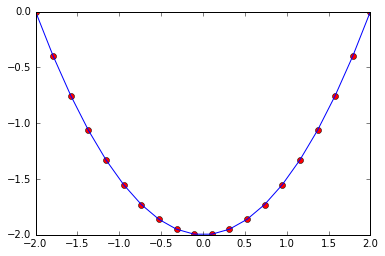

In [11]:
from scipy import integrate
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, num=20)
y = x
y_int = integrate.cumtrapz(y, x, initial=0)
plt.plot(x, y_int, 'ro', x, y[0] + 0.5 * x**2, 'b-')
plt.show()


### Exercise 5

Compute a numerical integral 

$$\int_{-1}^1 \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{x^2}{2}\right) dx$$

using an array of 10,100, and 1000 samples, and trapezoid and Simpson methods; compare the precision of the integral to what *quad* returns. 

For this exercise, please **put your numerical integral** inside the numerical_integral variable. This is the format we're trying out for future homework assignments for the autograder to run. For this workshop, it is ungraded.

In [ ]:
### CODE HERE


### please include your answer in this variable:
numerical_integral = "YOUR NUMERICAL INTEGRAL"

## Submission
**Please run this line of code to submit your work to OkPy.**

In [3]:
_ = ok.submit()

NameError: name 'ok' is not defined